In [1]:
import pandas as pd
import numpy as np

# Data Viz library
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df_FW = pd.read_csv(r'C:\Users\JayNB\OneDrive\เดสก์ท็อป\NIDA\ML_QUIZ\log2.csv')

In [3]:
df_FW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [4]:
# ดูข้อมูล head 5 บรรทัดแรก
df_FW.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


<Axes: xlabel='Action', ylabel='count'>

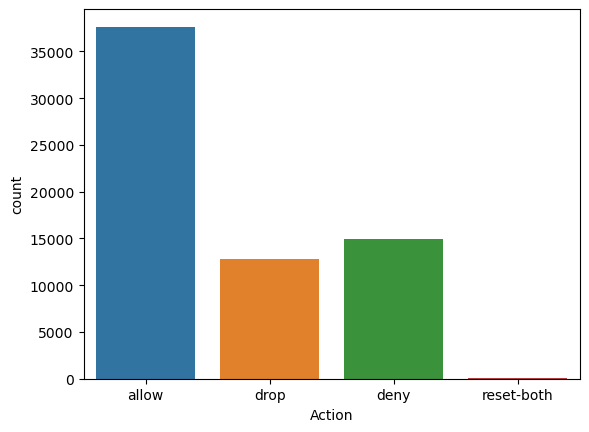

In [5]:
sns.countplot(x = 'Action', data = df_FW)

In [6]:
pd.value_counts(df_FW["Action"], sort=True)

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

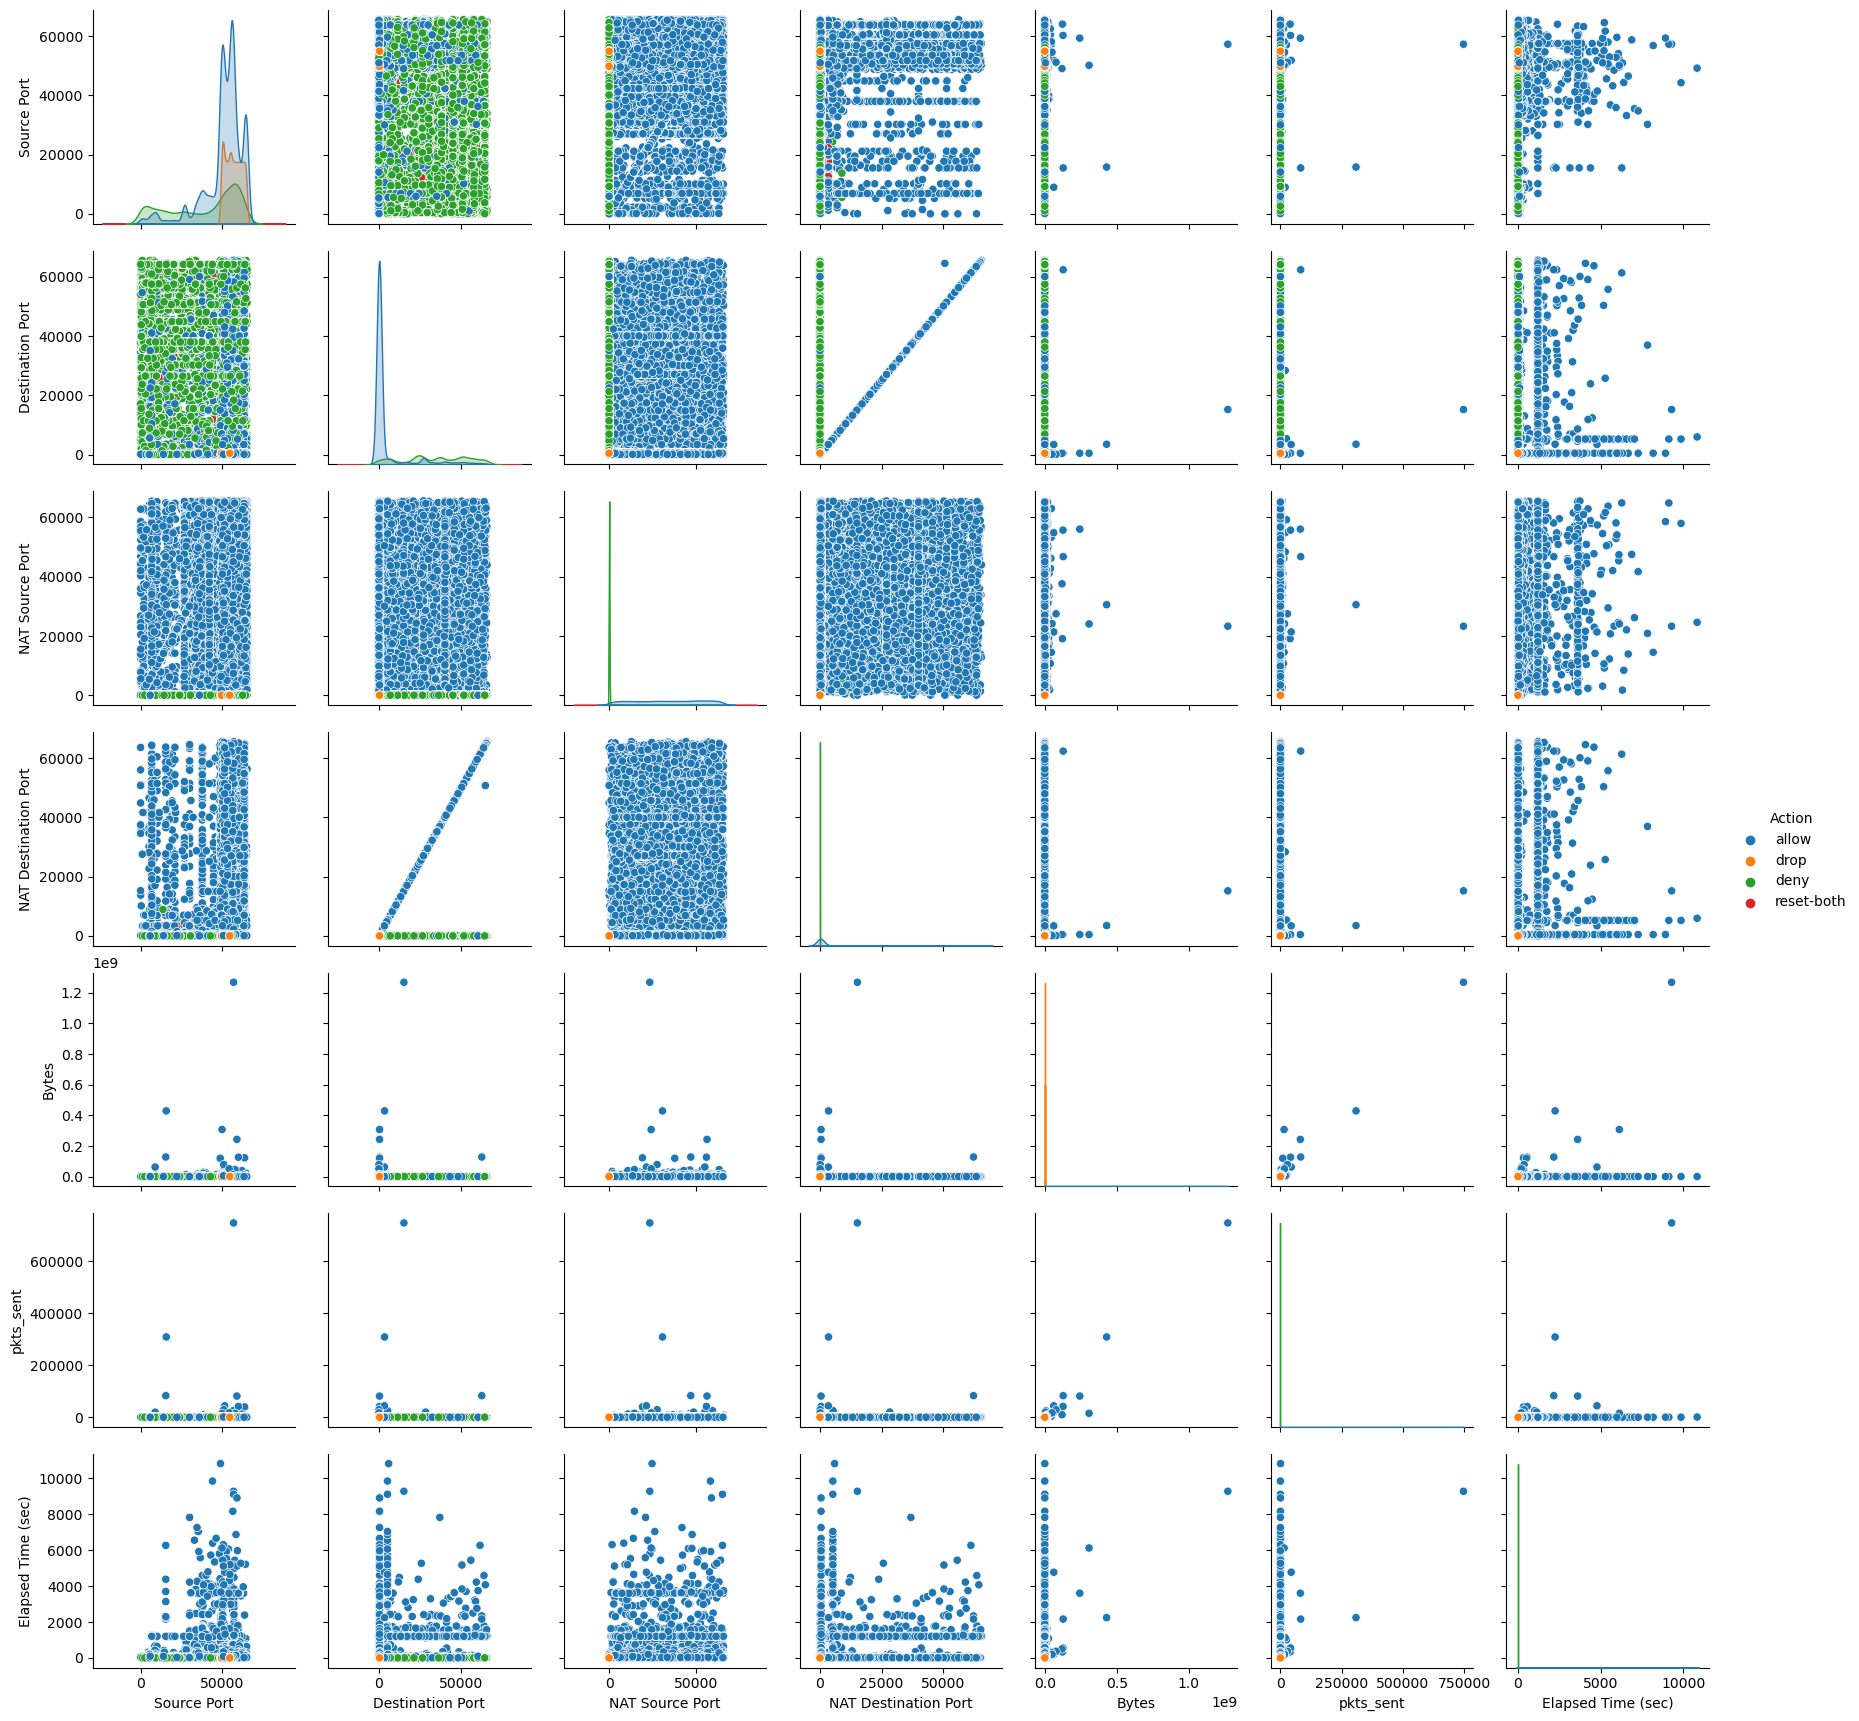

In [8]:
g = sns.pairplot(df_FW, vars=["Source Port","Destination Port","NAT Source Port","NAT Destination Port", "Bytes","pkts_sent","pkts_received","Elapsed Time (sec)"], hue= 'Action')

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# สร้างตัวแปรทำนาย (X: Independents) และตัวแปรเป้าหมาย (Y: Target label) สำหรับ Decision Tree model

X = df_FW[["Source Port","Destination Port","NAT Source Port","NAT Destination Port", "Bytes","pkts_sent","pkts_received","Elapsed Time (sec)"]]
Y = df_FW['Action']

X

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,pkts_sent,pkts_received,Elapsed Time (sec)
0,57222,53,54587,53,177,1,1,30
1,56258,3389,56258,3389,4768,10,9,17
2,6881,50321,43265,50321,238,1,1,1199
3,50553,3389,50553,3389,3327,8,7,17
4,50002,443,45848,443,25358,13,18,16
...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,4,2,15
65528,50964,80,13485,80,4680740,985,3690,77
65529,54871,445,0,0,70,1,0,0
65530,54870,445,0,0,70,1,0,0


In [13]:
# ใช้วิธี Hold out แบ่ง Test 30 และ Train 70

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=55)

In [14]:
# นำเข้า Decision tree classifier

from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()

In [16]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
# ทำนายค่าในชุด test set ที่แบ่งไว้ 30%

pred = dtree.predict(X_test)

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test, pred))
print('\n')
print(confusion_matrix(y_test, pred))

              precision    recall  f1-score   support

       allow       1.00      1.00      1.00     11378
        deny       1.00      1.00      1.00      4452
        drop       1.00      1.00      1.00      3811
  reset-both       0.77      0.53      0.62        19

    accuracy                           1.00     19660
   macro avg       0.94      0.88      0.90     19660
weighted avg       1.00      1.00      1.00     19660



[[11377     1     0     0]
 [    0  4437    12     3]
 [    0    10  3801     0]
 [    0     9     0    10]]


In [20]:
dtree.fit(X_train, y_train)
dtree.score(X_train, y_train)

0.9997166027206139

In [22]:
pd.value_counts(y_train.values)

allow         26262
deny          10535
drop           9040
reset-both       35
dtype: int64

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz

%matplotlib inline

In [24]:
import os
os.environ['PATH'] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin\dot.exe'

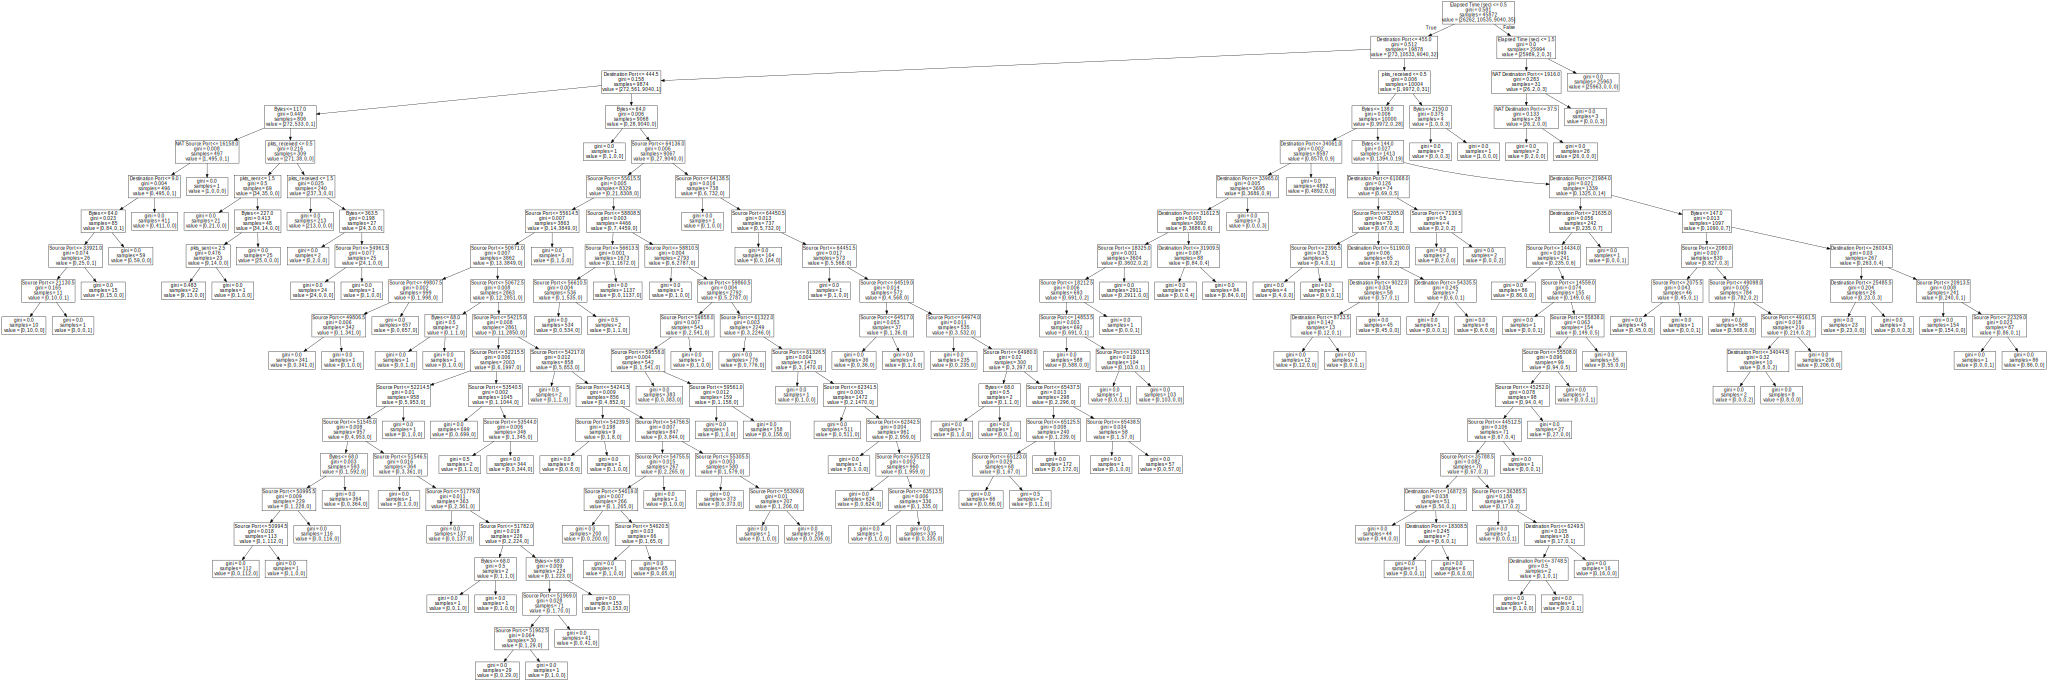

In [25]:
export_graphviz(dtree, out_file = "firewall.dot", feature_names = X_train.columns)

with open(r'C:\Users\JayNB\OneDrive\เดสก์ท็อป\NIDA\ML_QUIZ\firewall.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [32]:
classification_tree_firewall = DecisionTreeClassifier(max_depth = 20)
classification_tree_firewall.fit(X_train, y_train)
classification_tree_firewall.score(X_train, y_train)

0.9997166027206139

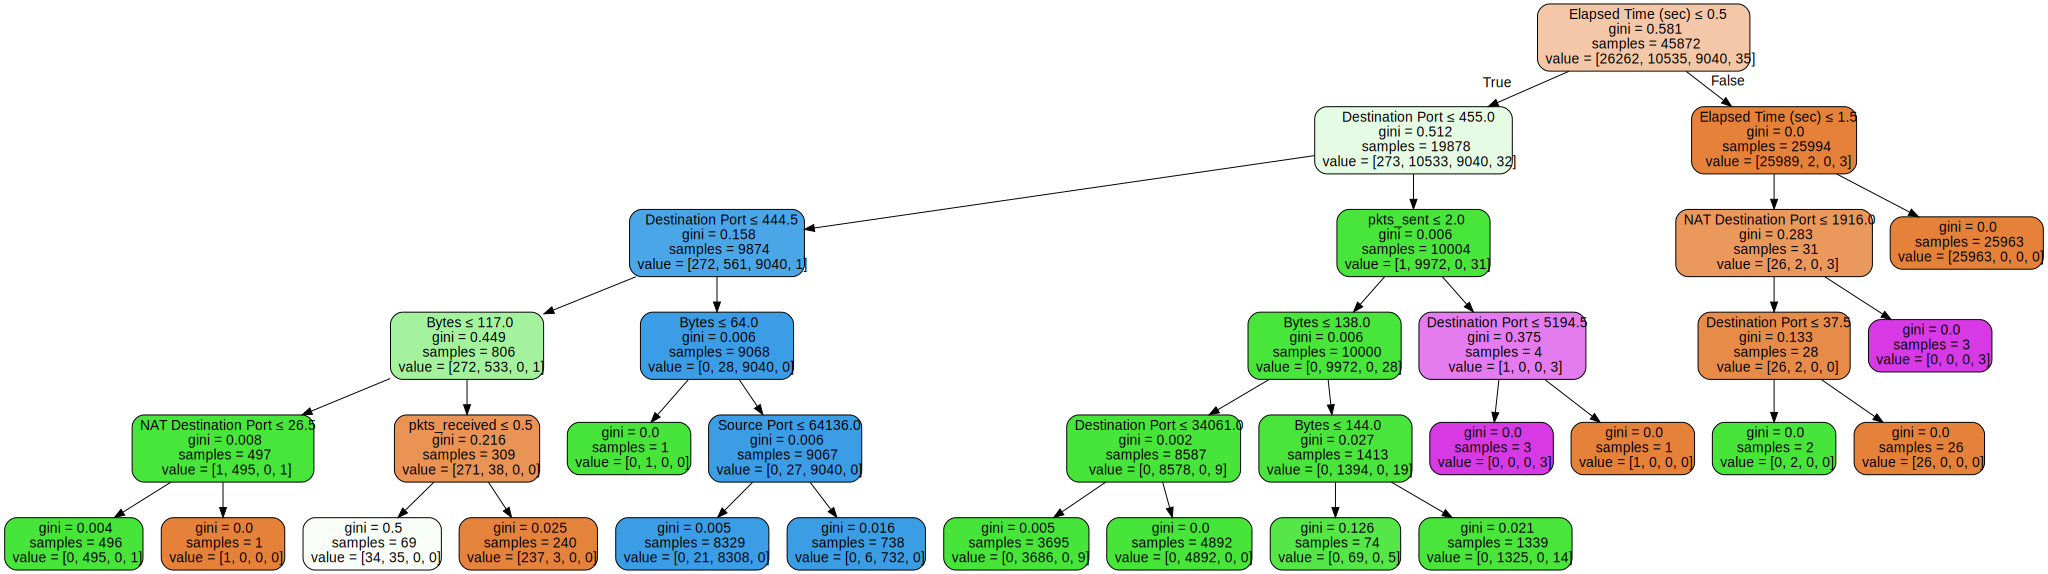

In [27]:
export_graphviz(classification_tree_firewall, 
                out_file = "firewall_tree.dot", 
                feature_names = X_train.columns,
                filled=True, rounded=True,  
                special_characters=True)

with open("firewall_tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)
